<a href="https://colab.research.google.com/github/shalman13091994/self_learning/blob/main/rgbcnn_sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we will train a CNN to classify images from the CIFAR-10 dataset

[project link for RGB images](https://jovian.com/paulbindass/convolutional-neural-network-world#C92)



STEPS INVOLVE IN CNN

1. Data Ingestion
2. EDA - Image sizes
3. Preprocessing/Feature engineering - Resize, normalize
4. Model building - CNN, ViT
5. Model evaluation - Accuracy, IoU

1. **Data Ingestion**

1. Load CIFAR-10 Database

In [1]:
from tensorflow.keras.datasets import cifar10

# load the pre-shuffled train and test data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape
y_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 1)

In [2]:
X_train.shape


(50000, 32, 32, 3)

2. Visualize the data

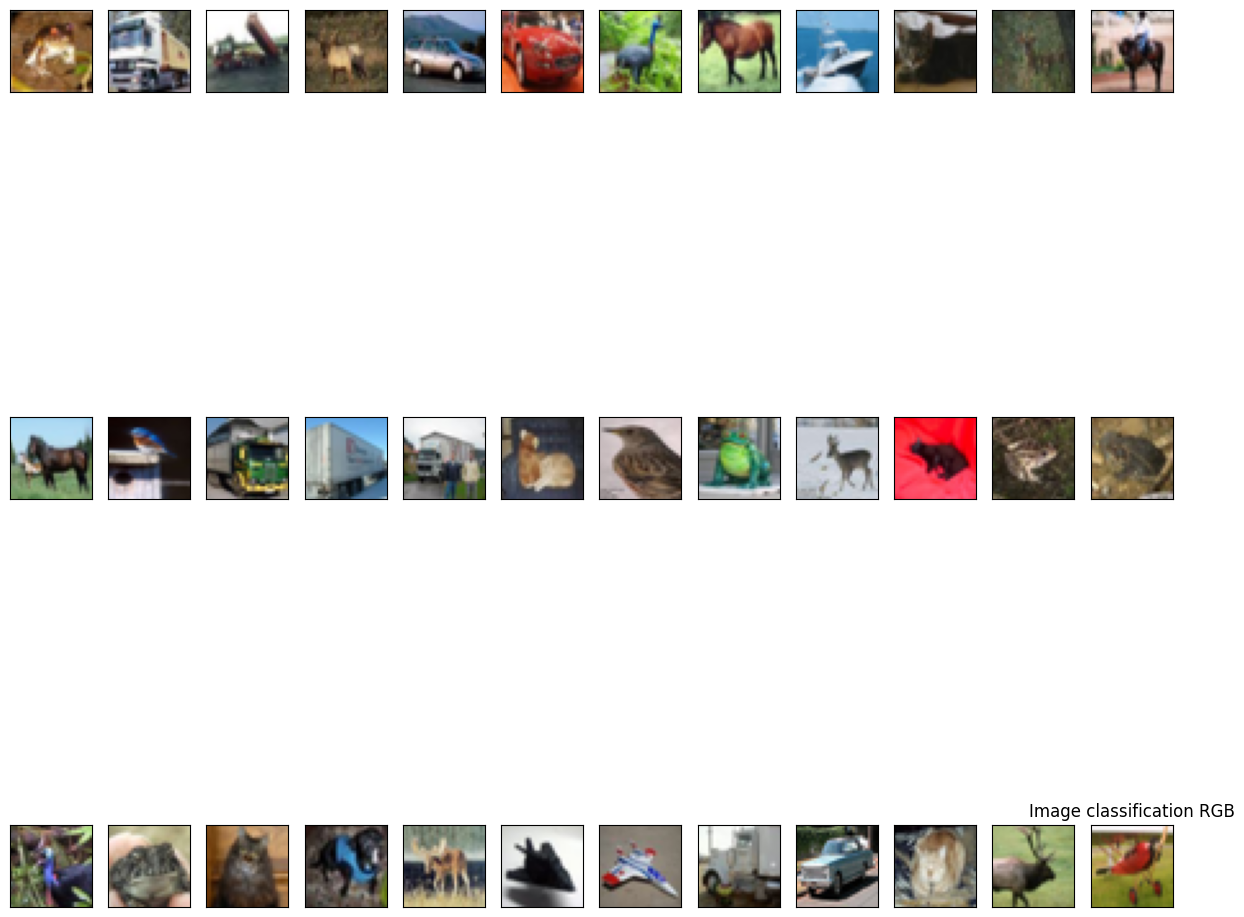

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


fig = plt.figure(figsize=(15,15))
for i in range(36):
     ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
     ax.imshow(np.squeeze(X_train[i]))
plt.title('Image classification RGB')
plt.show()


3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train.shape


(50000, 32, 32, 3)

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

2. **Feature Engineering**

1. Resizing the data

its not required its already resized in (num_images, 28, 28,1) Grayscale → 1 channel RGB → 3 channels (Red, Green, Blue)


2. Split Training dataset into Testing, and Validation Sets and Normalisation

In [6]:
# break training set into training and validation sets

from tensorflow.keras.utils import to_categorical
import numpy as np

# one-hot encode the labels - normalisation
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# break training set into training and validation sets after enconding
(x_train, x_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'x_train samples')
print(y_train.shape[0], 'y_train samples')
print(X_test.shape[0], 'x_test samples')
print(x_valid.shape[0], 'x_validation samples')



x_train shape: (45000, 32, 32, 3)
45000 x_train samples
45000 y_train samples
10000 x_test samples
5000 x_validation samples


3. **Model Architecture - MODEL BUILDING**

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D # instead of flatten n dense layer
model = Sequential()

#Conv2D with depth of 16
model.add(Conv2D(16, kernel_size=(3, 3), activation ='relu', padding='same',  input_shape=(32, 32, 3))) #  output of CONV_1 - (32, 32, 3)  - now depth is 16 kernels

#Max pooling - downsample the image to choose the best feature
model.add(MaxPooling2D(pool_size=(2, 2)))  #  output  (16, 16, 3)
#Conv2D with depth of 32
model.add(Conv2D(32, kernel_size=(3, 3), activation ='relu', padding='same')) #  output  (8, 8, 3)

#Max pooling - downsample the image to choose the best feature
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv2D with depth of 64
model.add(Conv2D(64, kernel_size=(3, 3), activation ='relu', padding='same')) # output  (4, 4, 3) - while closing it can be even


#Max pooling - downsample the image to choose the best feature
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35)) # Added dropout

#flatten the layer
model.add(Flatten())

#FC1: dense the layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.44)) # Stronger dropout before output layer


# model.add(GlobalAveragePooling2D())  # 🆕 replacing Flatten + Dense to avoid overfitting

#FC2: dense the layer
model.add(Dense(10, activation='softmax'))




model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       512,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,094 (2.06 MB)

 Trainable params: 541,094 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

4. Loss Function  -  Compile the Model

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # change the optimizer also if accuracy is less first add dropout n increase the value n then if doesn't help change the optimizer


5. Train the model




In [38]:
# print number of training, validation, and test images
print(x_train.shape[0])
print(y_train.shape[0], 'y_train samples')
print(x_valid.shape[0], 'validation samples')

45000
45000 y_train samples
5000 validation samples


In [39]:
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping


early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) #patience = 3 it will wait till 3 continuous val_loss improved

check_point = ModelCheckpoint(filepath ='bestmodel.h5', verbose =1,  save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_valid, y_valid), callbacks=[check_point, early_stop], verbose=2, shuffle=True)


Epoch 1/20

Epoch 1: val_loss improved from inf to 1.26331, saving model to bestmodel.h5


1407/1407 - 11s - 8ms/step - accuracy: 0.4296 - loss: 1.5647 - val_accuracy: 0.5566 - val_loss: 1.2633
Epoch 2/20

Epoch 2: val_loss improved from 1.26331 to 1.03996, saving model to bestmodel.h5


1407/1407 - 5s - 3ms/step - accuracy: 0.5606 - loss: 1.2222 - val_accuracy: 0.6246 - val_loss: 1.0400
Epoch 3/20

Epoch 3: val_loss improved from 1.03996 to 0.93639, saving model to bestmodel.h5


1407/1407 - 6s - 4ms/step - accuracy: 0.6173 - loss: 1.0787 - val_accuracy: 0.6724 - val_loss: 0.9364
Epoch 4/20

Epoch 4: val_loss improved from 0.93639 to 0.85439, saving model to bestmodel.h5


1407/1407 - 4s - 3ms/step - accuracy: 0.6492 - loss: 0.9884 - val_accuracy: 0.7060 - val_loss: 0.8544
Epoch 5/20

Epoch 5: val_loss did not improve from 0.85439
1407/1407 - 5s - 3ms/step - accuracy: 0.6726 - loss: 0.9279 - val_accuracy: 0.7072 - val_loss: 0.8654
Epoch 6/20

Epoch 6: val_loss improved from 0.85439 to 0.80638, saving model to bestmodel.h5


1407/1407 - 5s - 4ms/step - accuracy: 0.6878 - loss: 0.8813 - val_accuracy: 0.7202 - val_loss: 0.8064
Epoch 7/20

Epoch 7: val_loss did not improve from 0.80638
1407/1407 - 5s - 3ms/step - accuracy: 0.7038 - loss: 0.8386 - val_accuracy: 0.7180 - val_loss: 0.8260
Epoch 8/20

Epoch 8: val_loss improved from 0.80638 to 0.77117, saving model to bestmodel.h5


1407/1407 - 5s - 4ms/step - accuracy: 0.7191 - loss: 0.8009 - val_accuracy: 0.7356 - val_loss: 0.7712
Epoch 9/20

Epoch 9: val_loss improved from 0.77117 to 0.75172, saving model to bestmodel.h5


1407/1407 - 4s - 3ms/step - accuracy: 0.7281 - loss: 0.7731 - val_accuracy: 0.7438 - val_loss: 0.7517
Epoch 10/20

Epoch 10: val_loss improved from 0.75172 to 0.74273, saving model to bestmodel.h5


1407/1407 - 5s - 3ms/step - accuracy: 0.7378 - loss: 0.7427 - val_accuracy: 0.7414 - val_loss: 0.7427
Epoch 11/20

Epoch 11: val_loss did not improve from 0.74273
1407/1407 - 5s - 4ms/step - accuracy: 0.7457 - loss: 0.7219 - val_accuracy: 0.7434 - val_loss: 0.7532
Epoch 12/20

Epoch 12: val_loss did not improve from 0.74273
1407/1407 - 4s - 3ms/step - accuracy: 0.7511 - loss: 0.7034 - val_accuracy: 0.7336 - val_loss: 0.7678
Epoch 13/20

Epoch 13: val_loss improved from 0.74273 to 0.73041, saving model to bestmodel.h5


1407/1407 - 6s - 4ms/step - accuracy: 0.7594 - loss: 0.6833 - val_accuracy: 0.7528 - val_loss: 0.7304
Epoch 14/20

Epoch 14: val_loss improved from 0.73041 to 0.72668, saving model to bestmodel.h5


1407/1407 - 5s - 3ms/step - accuracy: 0.7661 - loss: 0.6620 - val_accuracy: 0.7494 - val_loss: 0.7267
Epoch 15/20

Epoch 15: val_loss improved from 0.72668 to 0.69289, saving model to bestmodel.h5


1407/1407 - 5s - 4ms/step - accuracy: 0.7714 - loss: 0.6438 - val_accuracy: 0.7620 - val_loss: 0.6929
Epoch 16/20

Epoch 16: val_loss did not improve from 0.69289
1407/1407 - 5s - 3ms/step - accuracy: 0.7759 - loss: 0.6356 - val_accuracy: 0.7476 - val_loss: 0.7257
Epoch 17/20

Epoch 17: val_loss did not improve from 0.69289
1407/1407 - 4s - 3ms/step - accuracy: 0.7808 - loss: 0.6174 - val_accuracy: 0.7606 - val_loss: 0.7061
Epoch 18/20

Epoch 18: val_loss did not improve from 0.69289
1407/1407 - 6s - 4ms/step - accuracy: 0.7850 - loss: 0.6105 - val_accuracy: 0.7566 - val_loss: 0.7084


OBSERVATION ITS OVERFITTING

accuracy: 0.8923 - loss: 0.3192 - val_accuracy: 0.7108 - val_loss: 1.1989

🔢 Typical Dropout Values:

After Conv blocks: 0.2 to 0.3

After Dense layers: 0.4 to 0.5




```
Epoch 1: val_loss improved from inf to 0.99033, saving model to bestmodel.h5
WARNING:absl:You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`.
1407/1407 - 56s - 40ms/step - accuracy: 0.6651 - loss: 0.9536 - val_accuracy: 0.6584 - val_loss: 0.9903
```



🔢 What each part means:
1407/1407: Number of training batches processed.

56s: Time taken for this epoch.

40ms/step: Average time taken per batch.

accuracy: 0.6651: Training accuracy = 66.51%

loss: 0.9536: Training loss.

val_accuracy: 0.6584: Validation accuracy = 65.84%

val_loss: 0.9903: Validation loss.

6. MODEL EVALUATION

In [40]:
# evaluate test accuracy
test_score = model.evaluate(X_test, y_test, verbose=0)

train_score = model.evaluate(x_valid, y_valid, verbose=0)

print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

Test loss: 0.7192428708076477
Test accuracy: 0.7526000142097473
Train loss: 0.6928876638412476
Train accuracy: 0.7620000243186951


OBSERVATION - for overfitting only so adding Dropout will turns off some neurons during training

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


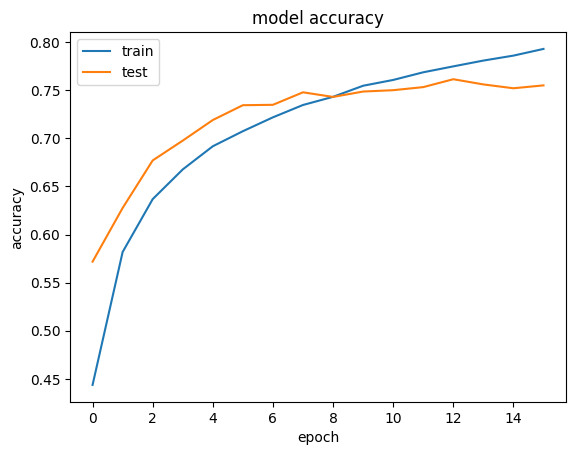

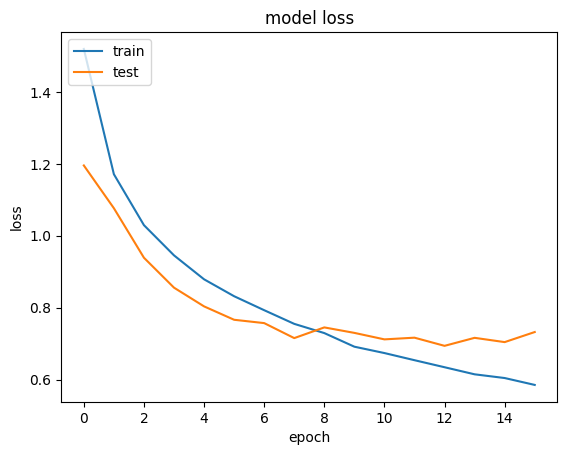

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline


# Access history data
history = history.history

# list all data in training
print(history.keys())

# summarize training for accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Visualize Some Predictions**

In [29]:
# get predictions on the test set
y_hat = model.predict(X_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


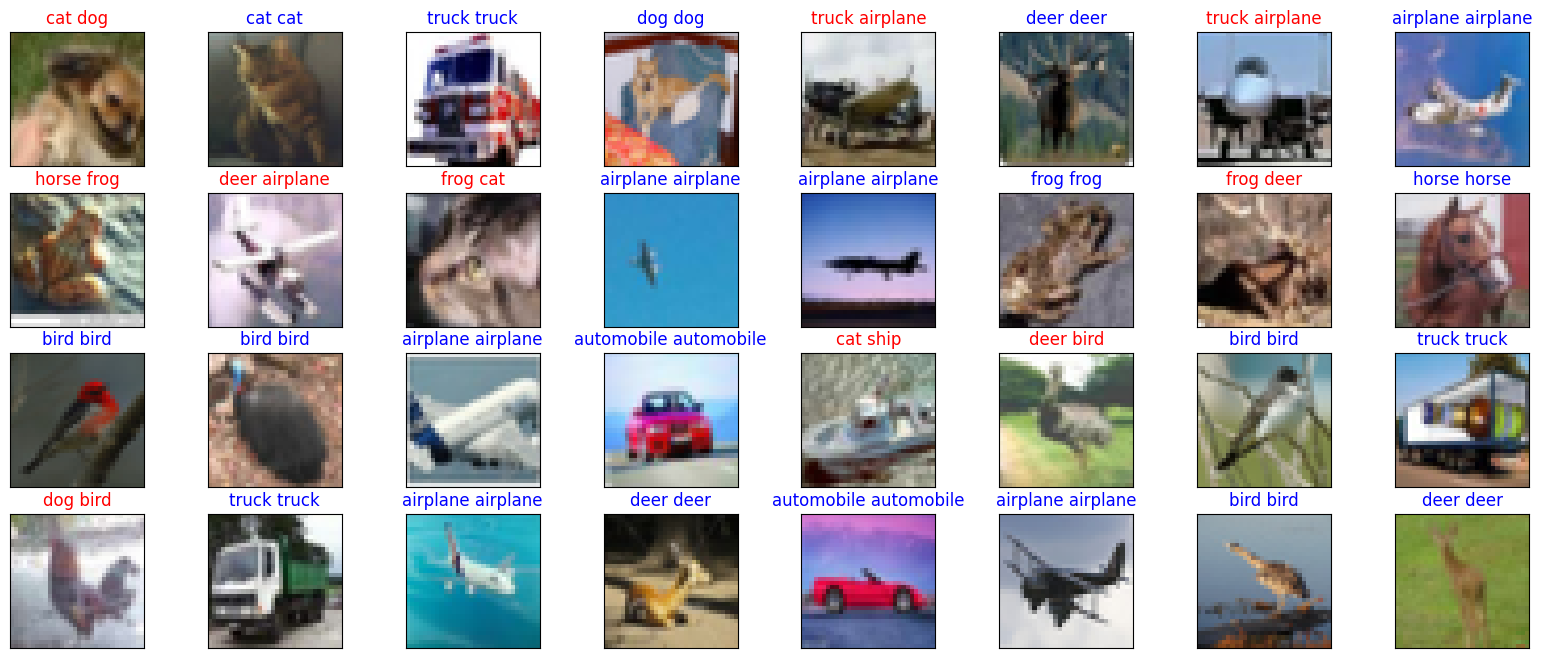

In [41]:
# plot a random sample of test images, their predicted labels, and ground truth

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} {}".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                   color=("blue" if pred_idx == true_idx else "red"))
